In [56]:
import numpy as np

In [57]:
a1 = np.linspace(0.8,1.5,20) # Value of the a1 varing from 0.8 to 1.5 total 20 values are considerd
print(a1)

[0.8        0.83684211 0.87368421 0.91052632 0.94736842 0.98421053
 1.02105263 1.05789474 1.09473684 1.13157895 1.16842105 1.20526316
 1.24210526 1.27894737 1.31578947 1.35263158 1.38947368 1.42631579
 1.46315789 1.5       ]


In [58]:
a2 = (1/(np.sqrt(a1))) # as a3 = a2 , using this relation the value of a2 is calculated for all the values of a1
print(a2)

[1.11803399 1.09314617 1.06984967 1.04798182 1.02740233 1.00798947
 0.98963703 0.97225184 0.95575182 0.94006432 0.92512478 0.91087558
 0.89726515 0.88424714 0.87177979 0.85982534 0.84834956 0.83732133
 0.82671231 0.81649658]


In [59]:
a1 = np.array(a1)
a2 = np.array(a2)
print(a2)

[1.11803399 1.09314617 1.06984967 1.04798182 1.02740233 1.00798947
 0.98963703 0.97225184 0.95575182 0.94006432 0.92512478 0.91087558
 0.89726515 0.88424714 0.87177979 0.85982534 0.84834956 0.83732133
 0.82671231 0.81649658]


In [60]:
p = 0.838*a2**2
print(p)

[1.0475     1.00138365 0.95915663 0.92034682 0.88455556 0.85144385
 0.82072165 0.7921393  0.76548077 0.74055814 0.71720721 0.69528384
 0.67466102 0.65522634 0.63688    0.61953307 0.60310606 0.58752768
 0.57273381 0.55866667]


In [61]:
Uni_stress = -p + 0.838*a1**2
print(Uni_stress)

[-0.51118    -0.4145283  -0.31949103 -0.22559607 -0.13244475 -0.03969809
  0.05293397  0.14570108  0.23881929  0.33247649  0.42683689  0.52204463
  0.61822674  0.7154956   0.81395102  0.91368194  1.01476785  1.11728003
  1.22128259  1.32683333]


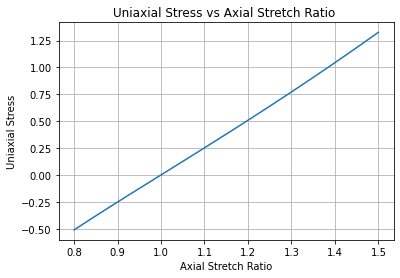

In [62]:
import matplotlib.pyplot as plt

xpoints = a1
ypoints = Uni_stress

plt.plot(xpoints, ypoints)
plt.xlabel("Axial Stretch Ratio")
plt.ylabel("Uniaxial Stress")
plt.grid()
plt.title("Uniaxial Stress vs Axial Stretch Ratio ")
plt.show()

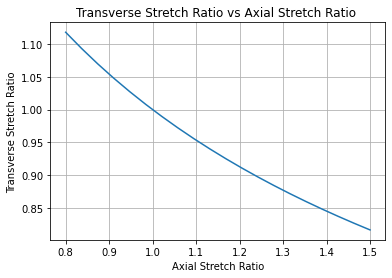

In [63]:
xpoints = a1
ypoints = a2

plt.plot(xpoints, ypoints)
plt.xlabel("Axial Stretch Ratio")
plt.grid()
plt.ylabel("Transverse Stretch Ratio")
plt.title("Transverse Stretch Ratio vs Axial Stretch Ratio ")
plt.show()

In [64]:
from scipy.optimize import fsolve

In [65]:
w = [-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4]

In [66]:
p_a1=[]
for k in w:
  #k = w[0]
  def func(i):
    x = i[0]
    y = i[1]
    F = np.empty(2)
    F[0] = -y + 0.838*(x**2+k**2)
    F[1] = -y + (0.838/x)
    return F
  guess = np.array([1,1])
  p_n = fsolve(func, guess)
  x = p_a1.append(p_n)
  

In [67]:
p

array([1.0475    , 1.00138365, 0.95915663, 0.92034682, 0.88455556,
       0.85144385, 0.82072165, 0.7921393 , 0.76548077, 0.74055814,
       0.71720721, 0.69528384, 0.67466102, 0.65522634, 0.63688   ,
       0.61953307, 0.60310606, 0.58752768, 0.57273381, 0.55866667])

In [68]:
q = [p_a1[0][1],p_a1[1][1],p_a1[2][1],p_a1[3][1],p_a1[4][1],p_a1[5][1],p_a1[6][1],p_a1[7][1],p_a1[8][1]]
print(q)
w1 = [p_a1[0][0],p_a1[1][0],p_a1[2][0],p_a1[3][0],p_a1[4][0],p_a1[5][0],p_a1[6][0],p_a1[7][0],p_a1[8][0]]
print(w1)

[0.8851614735854004, 0.8639092699500037, 0.8493236351189419, 0.8408026651355713, 0.838, 0.8408026651355713, 0.8493236351189419, 0.8639092699500037, 0.8851614735854004]
[0.9467199206160211, 0.9700092696638704, 0.986667467322564, 0.9966666790534973, 1.0, 0.9966666790534973, 0.986667467322564, 0.9700092696638704, 0.9467199206160211]


In [69]:
w1 = [p_a1[0][0],p_a1[1][0],p_a1[2][0],p_a1[3][0],p_a1[4][0],p_a1[5][0],p_a1[6][0],p_a1[7][0],p_a1[8][0]]
print(w1)

[0.9467199206160211, 0.9700092696638704, 0.986667467322564, 0.9966666790534973, 1.0, 0.9966666790534973, 0.986667467322564, 0.9700092696638704, 0.9467199206160211]


In [70]:
w2 = 1/np.sqrt(w1)
print(w2)

[1.02775416 1.01534131 1.00673367 1.00167084 1.         1.00167084
 1.00673367 1.01534131 1.02775416]


In [71]:
shear = []
for a1,k in zip(w1,w):
  s_s = 0.838*k*(1/np.sqrt(a1))
  shear.append(s_s)

In [72]:
shear

[-0.34450319356662557,
 -0.2552568062552404,
 -0.16872856382126572,
 -0.08394001628446406,
 0.0,
 0.08394001628446406,
 0.16872856382126572,
 0.2552568062552404,
 0.34450319356662557]

In [73]:
theta = []
for a1,a2,k in zip(w1,w2,w):
  angle = np.arccos((k*a1)/(np.sqrt(k**2+a2**2)))
  theta.append(angle)

In [74]:
theta

[1.921301249954215,
 1.8492395482198758,
 1.7642573025048884,
 1.6699670523710495,
 1.5707963267948966,
 1.4716256012187436,
 1.377335351084905,
 1.2923531053699173,
 1.220291403635578]

In [75]:
lambada_y = []
for a2,k in zip(w2,w):
  l_y = k**2+a2**2
  lambada_y.append(l_y)

In [76]:
lambada_x = w1
lambada_z = w2

In [77]:
print(lambada_x)
print(lambada_y)
print(lambada_z)

[0.9467199206160211, 0.9700092696638704, 0.986667467322564, 0.9966666790534973, 1.0, 0.9966666790534973, 0.986667467322564, 0.9700092696638704, 0.9467199206160211]
[1.2162786080906698, 1.1209179832338327, 1.0535126910727233, 1.013344469135527, 1.0, 1.013344469135527, 1.0535126910727233, 1.1209179832338327, 1.2162786080906698]
[1.02775416 1.01534131 1.00673367 1.00167084 1.         1.00167084
 1.00673367 1.01534131 1.02775416]


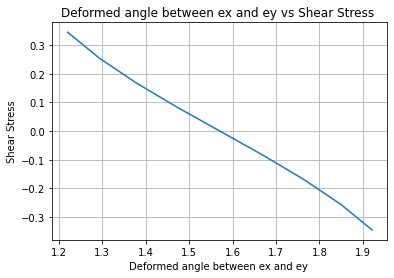

In [78]:
xpoints = theta
ypoints = shear

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Shear Stress")
plt.grid()
plt.title("Deformed angle between ex and ey vs Shear Stress ")
plt.show()


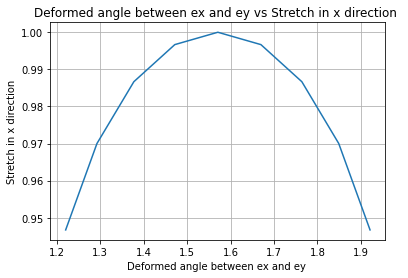

In [79]:
xpoints = theta
ypoints = lambada_x

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.grid()
plt.ylabel("Stretch in x direction")
plt.title("Deformed angle between ex and ey vs Stretch in x direction ")
plt.show()

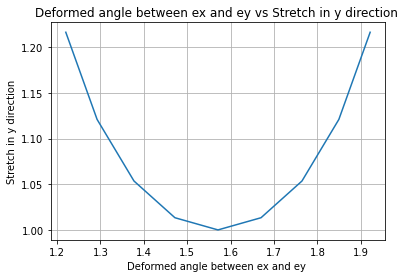

In [80]:
xpoints = theta
ypoints = lambada_y

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Stretch in y direction")
plt.title("Deformed angle between ex and ey vs Stretch in y direction ")
plt.grid()
plt.show()

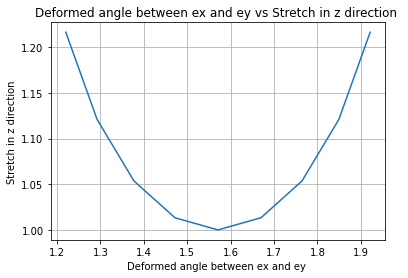

In [81]:
xpoints = theta
ypoints = lambada_y

plt.plot(xpoints, ypoints)
plt.xlabel("Deformed angle between ex and ey ")
plt.ylabel("Stretch in z direction")
plt.title("Deformed angle between ex and ey vs Stretch in z direction ")
plt.grid()
plt.show()